In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [29]:
im = cv2.imread("../input_data/bricks.jpg",0)

h = np.array([[0,1,0],[1,2,1],[0,1,0]])

conv_img = signal.convolve2d(im,h)

im_w,im_h = im.shape
h_w,h_h = h.shape

h = cv2.copyMakeBorder(h,(im_w)//2,(im_w)//2,(im_h)//2,(im_h)//2,cv2.BORDER_CONSTANT,value=0)
im = cv2.copyMakeBorder(im,(h_w)//2,(h_w)//2,(h_h)//2,(h_h)//2,cv2.BORDER_CONSTANT,value=0)


# im = np.pad(im,[im_w+h_w-1,im_h+h_h-1],'constant')
print(im.shape)
print(h.shape)

m,n = im.shape

F = np.fft.fft2(im)
H = np.fft.fft2(h)

filt = np.multiply(F,H)
# fft_conv = np.fft.fft2(conv_img)

res = np.fft.ifftshift(np.fft.ifft2(filt))

(335, 415)
(335, 415)


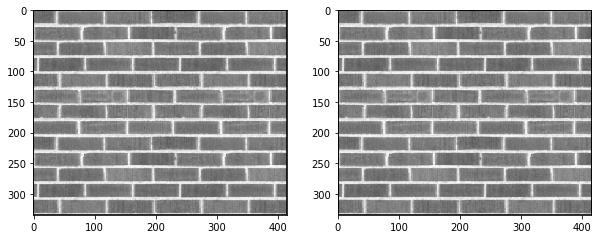

In [30]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(conv_img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res.real,cmap='gray')

### Low pass filter.